<a href="https://colab.research.google.com/github/Harshavalmiki/SJSU-Data-Mining-255/blob/main/Anamoly_dectection_pyOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Anomaly detection using pyOD for univariate or multivariate**

**Dataset**- https://archive.ics.uci.edu/dataset/292/wholesale+customers
Wholesale Customers-The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

In [1]:
# Install necessary libraries
!pip install matplotlib
!pip install pyod
!pip install scikit-learn
!pip install pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190292 sha256=032ac4d059d4a9288605149828167673d327e798abbc8d0cae7d789c6eb70d89
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pyod.models.iforest import IForest
from sklearn.metrics import classification_report




In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

# Load the Wholesale Customers Dataset
dataset_path = '/content/drive/MyDrive/DM/Customers.csv'  # Update with your file path
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [7]:
# Drop non-numeric columns (assuming anomaly detection on numeric features)
numeric_data = data.drop(['Channel', 'Region'], axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Train the Isolation Forest model
iforest_model = IForest(contamination=0.05, random_state=42)  # Adjust contamination based on the expected proportion of outliers
iforest_model.fit(scaled_data)

# Predict outliers
outlier_labels = iforest_model.predict(scaled_data)

# Add the outlier labels to the original dataframe
data['Outlier'] = outlier_labels

# Display the number of outliers
print("Number of outliers:", np.sum(outlier_labels == -1))



Number of outliers: 0


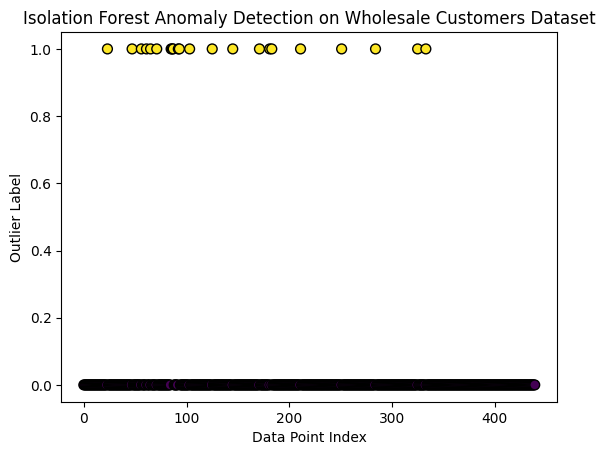

In [8]:

# Visualize the outliers
plt.scatter(data.index, data['Outlier'], c=data['Outlier'], cmap='viridis', edgecolors='k', s=50)
plt.title('Isolation Forest Anomaly Detection on Wholesale Customers Dataset')
plt.xlabel('Data Point Index')
plt.ylabel('Outlier Label')
plt.show()


In [9]:

# Print classification report
print(classification_report(np.ones_like(outlier_labels), outlier_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.05      0.10       440

    accuracy                           0.05       440
   macro avg       0.50      0.03      0.05       440
weighted avg       1.00      0.05      0.10       440



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
